# Extra Name Analyses

This notebooks has extra analyses related to variable names. These analyses did not make into the paper.

In [1]:
import sys
sys.path.insert(0, '../archaeology')

from collections import Counter

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from db import connect
import analysis_helpers, importlib
importlib.reload(analysis_helpers)
from analysis_helpers import display_counts, fig

%matplotlib inline

## Query

Select features from:

- existing
  
  ```n.skip & 2048 = 0```


- valid
  
  ```NOT (n.kernel = 'no-kernel' AND n.nbformat = '0')
  AND n.processed & 15 = 0 AND n.skip & (1024 + 512) = 0```


- non-duplicated
  
  ```n.skip & (1024 + 512 + 128) = 0```


- python notebooks
  
  ```n.language = 'python'```


- with valid syntax
  
  ```n.processed & 16 = 0
  AND LEFT(n.language_version, 1) IN ('2', '3')```

In [2]:
%%time

with connect() as session:
    names = pd.read_sql("""
        SELECT f.*
        FROM notebooks n, notebook_names f
        WHERE NOT (n.kernel = 'no-kernel' AND n.nbformat = '0')
        AND n.processed & 15 = 0
        AND n.skip & 2048 = 0
        AND n.skip & (1024 + 512) = 0
        AND n.skip & (1024 + 512 + 128) = 0
        AND n.language = 'python'
        AND n.processed & 16 = 0
        AND LEFT(n.language_version, 1) IN ('2', '3')
        AND f.notebook_id = n.id
    """, session.connection())
    print("Valid Python notebooks:", len(names))


Valid Python notebooks: 886668
CPU times: user 30.7 s, sys: 2.58 s, total: 33.3 s
Wall time: 1min 7s


In [3]:
#prefix = ["any", "nonlocal", "local", "class", "global", "main"]
#suffix = ["any", "class", "import", "importfrom", "function", "param", "del", "load", "store"]
prefix = ["any"]
suffix = ["any"]

for p in prefix:
    for s in suffix:
        column = "{}_{}".format(p, s)
        print(column)
        names[column + "_dict"] = names.apply((lambda r: {
            k: int(v)
            for k, v in zip(r[column].split(","), r[column + "_counts"].split(","))
            if k
            if int(v)
        }), axis = 1)
        names[column + "_count"] = names[column + "_dict"].apply(lambda x: sum(x.values()))
        names[column + "_count_unique"] = names[column + "_dict"].apply(lambda x: sum(1 for _ in x))
        

any_any


In [4]:
names.head(5)

,id,repository_id,notebook_id,index,index_count,any_any,any_any_counts,any_class,any_class_counts,any_import,...,main_del_counts,main_load,main_load_counts,main_store,main_store_counts,others,skip,any_any_dict,any_any_count,any_any_count_unique
0,180980,144881,883968,"1,3,5,6",4,"df,sp,df1,i,pd,spotipy,playlist_names,songs,id...","7,5,5,5,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2",,,"math,pd,spotipy",...,,"df,i,sp,pd,len,df1,spotipy,range,playlist_name...","5,4,3,3,3,3,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1","sp,df,df1,cid,secret,client_credentials_manage...","2,2,2,1,1,1,1,1,1,1,1,1,1,1",,0,"{'df': 7, 'sp': 5, 'df1': 5, 'i': 5, 'pd': 4, ...",63,21
1,678904,229917,1297595,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",23,"x,traces,go,y,np,auto,py,layout,fig,pd,range","15,13,12,11,8,7,6,6,6,5,1",,,"np,pd,py,go",...,,"go,x,traces,y,np,auto,py,pd,layout,fig,range","11,10,9,8,7,6,5,4,3,3,1","x,traces,y,layout,fig,auto","5,4,3,3,3,1",,0,"{'x': 15, 'traces': 13, 'go': 12, 'y': 11, 'np...",90,11
2,754288,23811,204891,,0,,,,,,...,,,,,,,0,{},0,0
3,964604,210558,1204406,,0,,,,,,...,,,,,,,0,{},0,0
4,228089,201376,1151280,,0,,,,,,...,,,,,,,0,{},0,0


## Count once by notebook

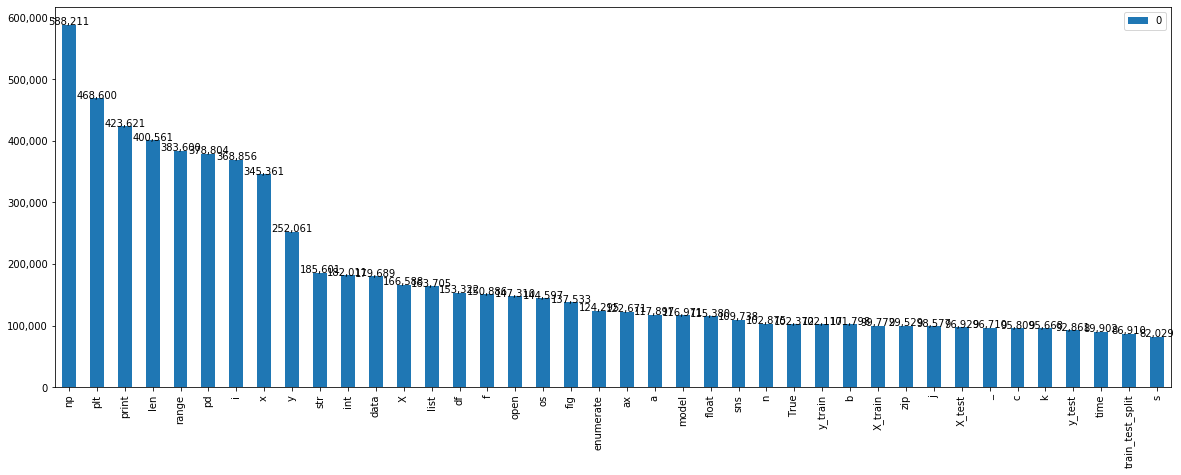

,0
np,588211
plt,468600
print,423621
len,400561
range,383600
pd,378804
i,368856
x,345361
y,252061
str,185601


In [5]:
counter = Counter()
names["any_any_dict"].apply(lambda x: counter.update(x.keys()))
counts = pd.Series(counter).sort_values(ascending=False)
display_counts(counts, show_values=True, logy=False, cut=slice(None,40))

## Count all uses across all notebooks


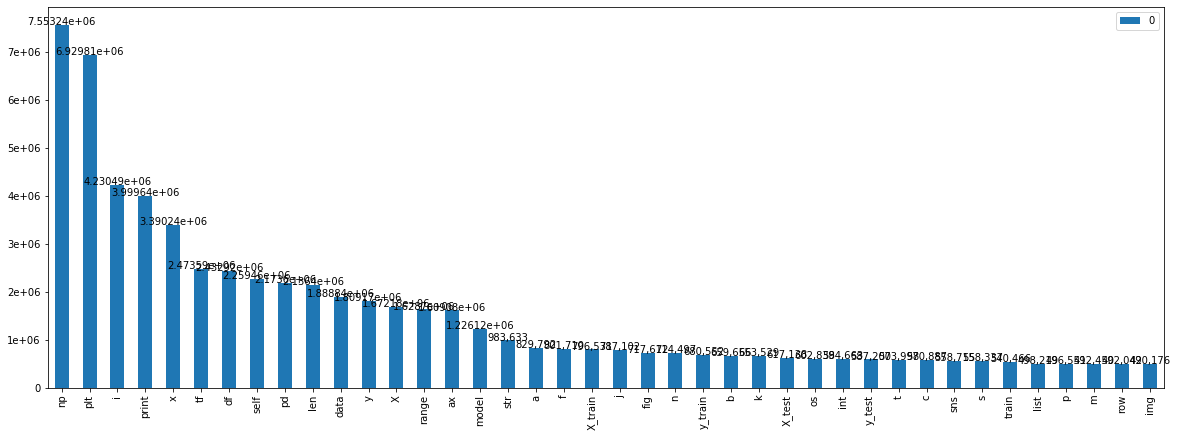

,0
np,7553235
plt,6929808
i,4230488
print,3999643
x,3390237
tf,2473586
df,2432919
self,2259456
pd,2173603
len,2136397


In [6]:
counter = Counter()
names["any_any_dict"].apply(lambda x: counter.update(x))
counts = pd.Series(counter).sort_values(ascending=False)
display_counts(counts, show_values=True, logy=False, cut=slice(None,40))

# Others

In [7]:
names[names["others"] != '']

,id,repository_id,notebook_id,index,index_count,any_any,any_any_counts,any_class,any_class_counts,any_import,...,main_del_counts,main_load,main_load_counts,main_store,main_store_counts,others,skip,any_any_dict,any_any_count,any_any_count_unique


This notebook analyzed the names used in the notebooks, but we did not include any of them in the paper